# Sentiment Analysis

# Text Mining

### Load and analyze dataset

In [3]:
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings('ignore')

In [4]:
# Load dataset
df = pd.read_csv('tweet_data.csv')
df.head()

,textID,tweet_text,sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative
1,1956967696,Funeral ceremony...gloomy friday...,negative
2,1956967789,wants to hang out with friends SOON!,positive
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative


Where 1 denotes negative sentiment and 0 denotes positive sentiment

In [5]:
#sample random tweets
df.sample(10)

,textID,tweet_text,sentiment
6755,1964456860,"I love summer, but I oddly don't want this sch...",positive
18332,1753773088,happy mothers day,positive
11078,1694647375,my wack friends are all raiding my kitchen. RE...,positive
1711,1958082200,i have the bigggest headache,negative
12903,1695883402,@rainstormiee Thank you.,positive
12702,1695693516,is excited to see Samantha&amp;Denise again h...,positive
15475,1752562730,Hanging with kevin tomorrow! out goes being p...,positive
3398,1961529608,@sparklej man i cant go on sunday cause im hel...,negative
7208,1964784153,@Tivon LMAO... just saw this. That sounds HELL...,positive
8298,1965694409,"trying to upload a custom background on here, ...",negative


In [6]:
# Get total number of tweets
print("Number of tweets: {}".format(len(df)))

Number of tweets: 18727


In [7]:
# Print out specific tweet (row of data)
tweet_id = 4879
tweet = df.iloc[tweet_id]

In [8]:
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: Bad Day. History Test Tommorrow. And I want to go out in the sun and play..
Tweet sentiment: negative


# Visualize Data

In [9]:
import matplotlib.pyplot as plt

In [10]:
# Visualize distribution of postive and negative sentiment over the entire dataset
sentiment_count = df['sentiment'].value_counts()
sentiment_count

positive    9897
negative    8830
Name: sentiment, dtype: int64

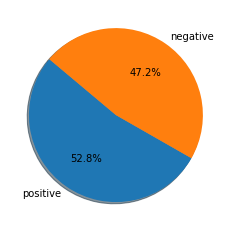

In [11]:
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

Data set is well balanced

In [12]:
# use wordcloud to visualize
from wordcloud import WordCloud

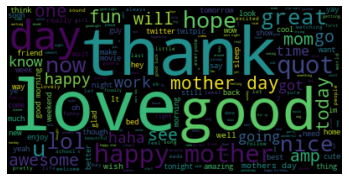

In [13]:
#WordlCloud for positive tweets
pos_tweets = df[df["sentiment"]=="positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

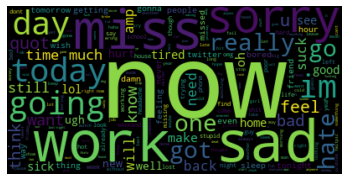

In [14]:
# WordCloud for Negative Tweets
neg_tweets = df[df["sentiment"]=="negative"]
txt = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Text Normalization

In [15]:
#import regex
import re

In [16]:
# Example tweet
tweet = "RT @ABC I love text normalization! 👍 https://ABC.com #NLP #Fun"

***Create Functions to deal with common but uninformative features of tweets***

***RT Tag***

In [17]:
#Replace 'RT' with a default value 
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

In [18]:
print("Processed tweet: {}".format(replace_retweet(tweet)))

Processed tweet: @ABC I love text normalization! 👍 https://ABC.com #NLP #Fun


***User Tag***

In [19]:
# Replace @ with a default user tag
def replace_user(tweet, default_replace="twitteruser"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet


In [20]:
print("Processed tweet: {}".format(replace_user(tweet)))

Processed tweet: RT twitteruser I love text normalization! 👍 https://ABC.com #NLP #Fun


***Emojis***

In [21]:
#Emojis do contain meaningful emotion so they cannot be discarded
# instead replace them with meaningful text
!pip install emoji --upgrade

In [22]:
import emoji

In [23]:
# Replace emoji with meaningful text
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [24]:
print("Processed tweet: {}".format(demojize(tweet)))

Processed tweet: RT @ABC I love text normalization! :thumbs_up: https://ABC.com #NLP #Fun


***URLs*** 

In [25]:
# Replace URLs (http:// or https://) with a default value (in this case just blank space)
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

In [26]:
print("Processed tweet: {}".format(replace_url(tweet)))

Processed tweet: RT @ABC I love text normalization! 👍  #NLP #Fun


***Hashtags***

In [27]:
# Replace #s with a default value
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

In [28]:
print("Processed tweet: {}".format(replace_hashtag(tweet)))

Processed tweet: RT @ABC I love text normalization! 👍 https://ABC.com NLP Fun


### Word Features

In [29]:
tweet = "I'm REALLY loooking for to my birthday! I can't wait!!"

In [30]:
# Make text lowercase
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

In [31]:
print("Processed tweet: {}".format(to_lowercase(tweet)))

Processed tweet: i'm really loooking for to my birthday! i can't wait!!


In [32]:
# Remove letter repetition
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

In [33]:
print("Processed tweet: {}".format(word_repetition(tweet)))

Processed tweet: I'm REALLY looking for to my birthday! I can't wait!!


In [34]:
# Remove Puncuation repetition
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

In [35]:
print("Processed tweet: {}".format(punct_repetition(tweet)))

Processed tweet: I'm REALLY loooking for to my birthday! I can't wait!


***Word Contraction***

In [36]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [37]:
import contractions

In [38]:
# List most common contractions
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

In [39]:
# Create function to replace contractions with extended forms
def _fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k, v)
  return tweet

In [40]:
print("Processed tweet: {}".format(_fix_contractions(tweet)))

Processed tweet: I am REALLY loooking for to my birthday! I cannot wait!!


In [41]:
# Create contractions function using contractions package
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [42]:
print("Processed tweet: {}".format(fix_contractions(tweet)))

Processed tweet: I am REALLY loooking for to my birthday! I cannot wait!!


# Tokenization

In [43]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
# example tweet
tweet = "The quick brown fox jumps over the lazy dog"

In [45]:
# Create tokenize function
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens

In [46]:
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize(tweet)))

<class 'list'>
Tweet tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


#### Custom Tokenization

In [47]:
import string

In [48]:
# Retrieve English Punctuation
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [49]:
# Import and download stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
# Create set of english stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'t', 'she', 'all', 'this', 'or', 'didn', 'here', 'off', 'then', "shouldn't", "you'd", 'itself', 'how', 'o', "won't", 'he', 'i', 'same', 'if', 'once', 'couldn', 'until', "she's", 'd', 'have', 'ma', "mightn't", 'my', 'having', 'yourselves', 'whom', "it's", 'not', 'too', "hasn't", 'in', 'of', 'about', 'themselves', "didn't", 'hadn', "isn't", 'as', 'myself', 'to', 'are', 'further', 'into', 'we', 'will', 've', 'is', 'than', 'mightn', 'needn', 'their', 'again', 'hasn', 'm', "don't", 'the', "you're", 'his', 'between', 'a', 's', 'doesn', "needn't", 'shan', 'ourselves', 'her', 'they', 'at', "hadn't", 'do', 'both', 'from', 'who', 'll', 'wasn', 'its', 'because', 'that', 'through', 'for', 'against', 'just', 'when', 'out', 'an', 're', 'before', 'were', 'yourself', 'on', 'any', 'more', 'only', 'did', 'while', 'under', "you'll", 'wouldn', 'has', 'no', 'yours', 'such', 'so', "weren't", "haven't", 'being', 'was', 'what', 'won', 'few', 'don', 'be', "shan't", 'where', 'by', 'mustn', 'theirs', 'herself',

In [51]:
# Remove stop words that may have diagnostic value
stop_words.discard('not')
print(stop_words)

{'t', 'she', 'all', 'this', 'or', 'didn', 'here', 'off', 'then', "shouldn't", "you'd", 'itself', 'how', 'o', "won't", 'he', 'i', 'same', 'if', 'once', 'couldn', 'until', "she's", 'd', 'have', 'ma', "mightn't", 'my', 'having', 'yourselves', 'whom', "it's", 'too', "hasn't", 'in', 'of', 'about', 'themselves', "didn't", 'hadn', "isn't", 'as', 'myself', 'to', 'are', 'further', 'into', 'we', 'will', 've', 'is', 'than', 'mightn', 'needn', 'their', 'again', 'hasn', 'm', "don't", 'the', "you're", 'his', 'between', 'a', 's', 'doesn', "needn't", 'shan', 'ourselves', 'her', 'they', 'at', "hadn't", 'do', 'both', 'from', 'who', 'll', 'wasn', 'its', 'because', 'that', 'through', 'for', 'against', 'just', 'when', 'out', 'an', 're', 'before', 'were', 'yourself', 'on', 'any', 'more', 'only', 'did', 'while', 'under', "you'll", 'wouldn', 'has', 'no', 'yours', 'such', 'so', "weren't", "haven't", 'being', 'was', 'what', 'won', 'few', 'don', 'be', "shan't", 'where', 'by', 'mustn', 'theirs', 'herself', 'himse

In [52]:
# Create a custom tokenize function
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

In [53]:
# Test
print("Tweet tokens: {}".format(custom_tokenize(tweet, 
                                                keep_punct=True, 
                                                keep_alnum=True, 
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Tweet tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Tweet tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']


# Stemming

In [54]:
# Import stemming libraries
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

In [55]:
# Example list of tokens
tokens = ["manager", "management", "managing"]

In [56]:
# Define stemmers using NLTK
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snoball_stemmer = SnowballStemmer('english')

In [57]:
# Create stem_tokens functions
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [58]:
# Print and compare results
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


In [59]:
# Check over and under stemming
tokens = ["international", "companies", "had", "interns"]

In [60]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


# Lemmatization

In [61]:
# Import libraries
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [62]:
tokens = ["international", "companies", "had", "interns"]

In [63]:
# Part of speech tagging
word_type = {"international": wordnet.ADJ, 
             "companies": wordnet.NOUN, 
             "had": wordnet.VERB, 
             "interns": wordnet.NOUN
             }

In [64]:
lemmatizer = WordNetLemmatizer()

In [65]:
# Create lemmatize_tokens function that takes the list of tokens as inputs and returs list of lemmatized tokens
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [66]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


#### Combining normalization techniques

In [71]:
complex_tweet = r"""@ABCDefgh : hey!, loooook at This!!!, what if we couldn't normalize it!! check https://abcdefgh.com
TIME TO TRY!!! #NLP #Sentiment"""

In [72]:
# Create custom process_tweet function to process complex tweet
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

In [73]:
print(process_tweet(complex_tweet, verbose=False))

['hey', 'look', 'could', 'not', 'normal', 'check', 'time', 'tri', 'nlp', 'sentiment']


# Text Vectorization

### Pre-processing Tweets

In [74]:
# Convert positive sentiment to '1' and negative sentiment to '0'
df["tokens"] = df["tweet_text"].apply(process_tweet)
df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1
                                              if i == "positive" else 0)
df.head(10)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, call]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[not, go, prom, bc, bf, not, like, friend]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmm],0
5,1956969035,@charviray Charlene my love. I miss you,negative,"[charlen, love, miss]",0
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative,"[i, sorri, least, friday]",0
7,1956969531,Choked on her retainers,negative,"[choke, retain]",0
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative,"[ugh, beat, stupid, song, get, next, rude]",0
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative,"[watch, hill, london, realis, tourtur, week, w...",0


In [75]:
# Convert DataFrame to two lists: one for tokens (X) and sentiment (Y)
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

In [76]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bc', 'bf', 'not', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['i', 'sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['i', 'sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['an

### Positive/Negative Frequency

In [77]:
#  Corpus of tweet tokens

In [78]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

sentiment = [1, 0, 1, 1, 0, 0]

In [79]:
# Create build_freqs function used to build a dictionary with the word and sentiment as index and the count of occurence as value
def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs

In [80]:
# Build the frequency dictionary on the corpus by using the function
freqs = build_freqs(corpus, sentiment)
print(freqs)

{('i', 1): 2, ('love', 1): 2, ('nlp', 1): 1, ('i', 0): 3, ('miss', 0): 1, ('you', 0): 1, ('you', 1): 2, ('are', 1): 1, ('happy', 1): 1, ('to', 1): 1, ('learn', 1): 1, ('lost', 0): 1, ('my', 0): 1, ('computer', 0): 1, ('am', 0): 1, ('so', 0): 1, ('sad', 0): 1}


In [89]:
# build freq_dic on entire dataset
freqs_all = build_freqs(X, y)
print(freqs_all)

{('layin', 0): 2, ('n', 0): 59, ('bed', 0): 110, ('headach', 0): 99, ('call', 0): 101, ('funer', 0): 10, ('friday', 0): 86, ('want', 1): 295, ('hang', 1): 41, ('friend', 1): 194, ('soon', 1): 142, ('not', 0): 2838, ('go', 0): 1014, ('prom', 0): 11, ('bc', 0): 14, ('bf', 0): 7, ('like', 0): 550, ('friend', 0): 156, ('hmm', 0): 18, ('charlen', 0): 1, ('love', 0): 67, ('miss', 0): 754, ('i', 0): 1672, ('sorri', 0): 387, ('least', 0): 35, ('choke', 0): 1, ('retain', 0): 2, ('ugh', 0): 155, ('beat', 0): 11, ('stupid', 0): 124, ('song', 0): 42, ('get', 0): 684, ('next', 0): 94, ('rude', 0): 7, ('watch', 0): 150, ('hill', 0): 7, ('london', 0): 14, ('realis', 0): 6, ('tourtur', 0): 1, ('week', 0): 157, ('late', 0): 84, ('itonlinelol', 0): 1, ('sleepi', 0): 17, ('even', 0): 162, ('fail', 0): 112, ('ladi', 0): 12, ('gaga', 0): 2, ('tweet', 0): 102, ('impress', 0): 13, ('video', 0): 20, ('leak', 0): 4, ('know', 0): 314, ('convinc', 0): 5, ('alway', 0): 84, ('want', 0): 470, ('signal', 0): 5, ('gi

In [82]:
print("Frequency of word 'love' in + tweets: {}".format(freqs_all[("love", 1)]))
print("Frequency of word 'love' in - tweets: {}".format(freqs_all[("love", 0)]))

Frequency of word 'love' in + tweets: 1358
Frequency of word 'love' in - tweets: 67


In [83]:
# Create tweet_to_freqa function used to convert tweets to a 2-d array by using the frequency dictionary
def tweet_to_freq(tweet, freqs):
  x = np.zeros((2,))
  for word in tweet:
    if (word, 1) in freqs:
      x[0] += freqs[(word, 1)]
    if (word, 0) in freqs:
      x[1] += freqs[(word, 0)]
  return x

In [84]:
# Print 2-d vector using the tweet_to_freqs function and the corpus dictionary 
print(tweet_to_freq(["i", "love", "nlp"], freqs))

[5. 3.]


In [85]:
# Print 2-d vector using the tweet_to_freqs function and the dataset dictionary 
print(tweet_to_freq(["i", "love", "nlp"], freqs_all))

[2528. 1739.]


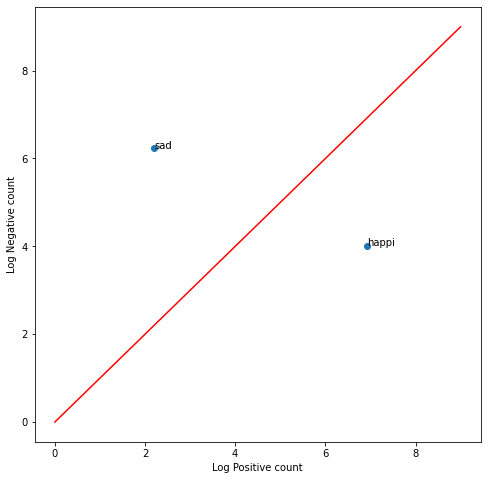

In [88]:
# Plot word vectors in a chart and see location 
fig, ax = plt.subplots(figsize = (8, 8))

word1 = "happi"
word2 = "sad"

def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)  

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, 9], [0, 9], color = 'red')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

### Bag of words approach

In [90]:
# Corpus for Bag of words method
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

In [91]:
from sklearn.feature_extraction.text import CountVectorizer

In [92]:
#create fit_cv function to build the Bag-of-Words vectorizer with the corpus
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

In [93]:
# use fit_cv function to fit vectorizer on corpus
cv_vect = fit_cv(corpus)

In [94]:
# Get vectorizer features
ft = cv_vect.get_feature_names()

In [95]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


In [96]:
# Convert corpus to a matrix 
cv_mtx = cv_vect.transform(corpus)

In [97]:
# Print shape
print("Matrix shape is: {}".format(cv_mtx.shape))

Matrix shape is: (6, 13)


In [98]:
# Convert matrix to array
cv_mtx.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]], dtype=int64)

In [101]:
# Transform a new tweet by using the vectorizer
new_tweet = [["lost", "lost", "miss", "miss"]]
cv_vect.transform(new_tweet).toarray()

array([[0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]], dtype=int64)

In [103]:
unknown_tweet = [["Tom", "eats", "apple"]]
cv_vect.transform(unknown_tweet).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

### Term Frequency - Inverse Document Frequency (TF-IDF)

In [105]:
# Corpus for tf-dif
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

In [108]:
#import tfidVectorizer from the Scikit-learn Library 
from sklearn.feature_extraction.text import TfidfVectorizer

In [109]:
#create fit_tfidf function to build tf-idf vectorizer with corpus
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

In [110]:
#fit_cv to fit vectorizer on corpus, and then transform
tf_vect = fit_tfidf(corpus)
tf_mtx = tf_vect.transform(corpus)

In [111]:
# Get vectorizer features
ft = tf_vect.get_feature_names()

In [112]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


In [113]:
# Print shape of matrix
print(tf_mtx.shape)

(6, 13)


In [114]:
# Convert to array
tf_mtx.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.56921261, 0.        , 0.        , 0.82219037,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.96260755, 0.        ,
        0.        , 0.27089981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68172171, 0.55902156, 0.        ,
        0.        , 0.47196441, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.52182349, 0.        , 0.        , 0.42790272,
        0.52182349, 0.        , 0.        , 0.52182349, 0.        ,
        0.        , 0.        , 0.        ],
       [0.52182349, 0.        , 0.        , 0.        , 0.42790272,
        0.        , 0.     

In [116]:
new_tweet = [["I", "hate", "nlp"]]
tf_vect.transform(new_tweet).toarray()

array([[0.        , 0.        , 0.        , 0.6340862 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.77326237,
        0.        , 0.        , 0.        ]])

# Final Sentiment Analysis

In [117]:
# Function to plot confusion matrix
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

## Train Test Split

In [119]:
# Check x and y 
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bc', 'bf', 'not', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['i', 'sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['i', 'sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['an

In [120]:
from sklearn.model_selection import train_test_split 

In [125]:
# use train_test_split function to split arrays of X and y into training and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    train_size=0.80)

In [126]:
#print size of variables
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

Size of X_train: 14981
Size of y_train: 14981


Size of X_test: 3746
Size of y_test: 3746


Train proportion: 80%


In [127]:
# Print random example tweets to check
import random
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment: {}".format(y_train[id]))

Train tweet: ['woke', 'amp', 'not', 'go', 'back', 'sleep', 'txt', 'bff', 'sayin', 'call', 'sound', 'import', 'hour', 'ago']
Sentiment: 1


### Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
# Create function to impose logistic regression on training data 
def fit_lr(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model

### Pos/Neg Frequency

In [131]:
# use build_freqs on training data to create a frequency dictionary
# convert frequency dictionary to 2-d vectors
freqs = build_freqs(X_train, y_train)
X_train_pn = [tweet_to_freq(tweet, freqs) for tweet in X_train]
X_test_pn = [tweet_to_freq(tweet, freqs) for tweet in X_test]

In [132]:
# Fit logistic regression  model on training data
# Print model coefficients
model_lr_pn = fit_lr(X_train_pn, y_train)
print(model_lr_pn.coef_, model_lr_pn.intercept_)

[[ 0.00264969 -0.00197997]] [-0.5060559]


### Count Vector

In [133]:
# use fit_cv on training data to build bag of words
# Transform X_train and X_test using vetorizer
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

In [134]:
# Fit logistic regression on model training data by using fit_lr
model_lr_cv = fit_lr(X_train_cv, y_train)

### TF - IDF

In [135]:
# use fit_cv on training data to build bag of words
# Transform X_train and X_test using vectorizer
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

In [136]:
# Fit logistic regression on training data
model_lr_tf = fit_lr(X_train_tf, y_train)

# Performance Metrics

In [137]:
# import accuracy score and confusion matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Pos/Neg Frequencies

In [138]:
#Use fitted model_lr_pn to predict X_test
y_pred_lr_pn = model_lr_pn.predict(X_test_pn)

In [139]:
# Print model accuracy
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))

LR Model Accuracy: 77.82%


<module 'seaborn' from 'C:\\Users\\Daniel\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

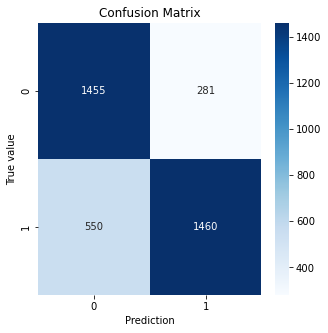

In [140]:
#Plot confusion matrix
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))

### Count Vector

In [147]:
# Use fitted model_lr_cv (Bag of Words) to predict X_test
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

In [148]:
# Print Model acccuracy
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

LR Model Accuracy: 88.52%


<module 'seaborn' from 'C:\\Users\\Daniel\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

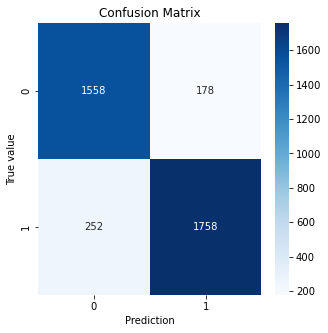

In [149]:
# Plot confusion matrix
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

### TF - IDF

In [150]:
# use model_lr_tf to predict X_test
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

In [151]:
# Print model accuracy
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

LR Model Accuracy: 88.60%


<module 'seaborn' from 'C:\\Users\\Daniel\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

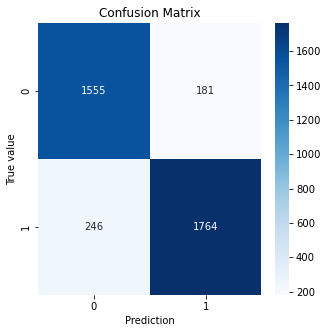

In [153]:
#Plot confusion matrix
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

# Check

In [154]:
# make tweet for test
my_tweet =  "RT @ABC: This was so much fun! NLP! Don't forget to check out https://ABC.com ... "

In [155]:
#Create predict_tweet function to check model by pre-processing, transforming, and predicting sentiment
def predict_tweet(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"

In [156]:
# Predict Sentiment
predict_tweet(my_tweet)

'Prediction is positive sentiment'